# Import des données

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Spécifier le chemin du fichier Excel
chemin_fichier = "ACP/CLGFRA.xlsx"

# Lire le fichier Excel en utilisant les lignes 3 à 15 comme en-têtes de colonnes
dfCLG = pd.read_excel(chemin_fichier)

In [93]:
label_ep = ['PV','PU HEP','REP','REP+']

In [2]:
dfCLG.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,GMMoy,GMHaut,IPS,EP
0,0040001E,10.3,6.9,30.2,21.6,3.4,48.2,48.3,150.1,6.9,44.8,48.2,99.4,1
1,0040004H,9.6,10.7,26.7,20.1,30.0,36.6,33.4,145.6,30.0,40.0,30.0,100.6,1
2,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,29.2,27.8,88.6,1
3,0040014U,10.0,5.9,28.2,22.0,11.5,38.4,50.0,124.0,33.3,51.8,14.8,102.5,1
4,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,40.7,34.8,98.3,1


In [3]:
dfCLG.shape

(6138, 14)

# Analyse en composantes principales

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
# Analyse des données manquantes dans le dataframe

In [6]:
dfCLG['EP'] = dfCLG['EP'].astype(float)

In [7]:
dfCLG.isnull().sum()

UAI       0
DNB_F     0
DNB_M     0
D_IPS     0
EsurD     0
GFBas     0
GFMoy     0
GFHaut    0
IEL       0
GMBas     0
GMMoy     0
GMHaut    0
IPS       0
EP        0
dtype: int64

In [8]:
# Analyse descriptive des variables quantitatives

In [9]:
dfCLG.dtypes

UAI        object
DNB_F     float64
DNB_M     float64
D_IPS     float64
EsurD     float64
GFBas     float64
GFMoy     float64
GFHaut    float64
IEL       float64
GMBas     float64
GMMoy     float64
GMHaut    float64
IPS       float64
EP        float64
dtype: object

<AxesSubplot:>

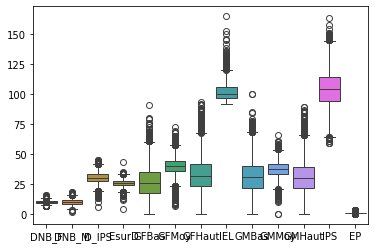

In [10]:
sns.boxplot(data=dfCLG)

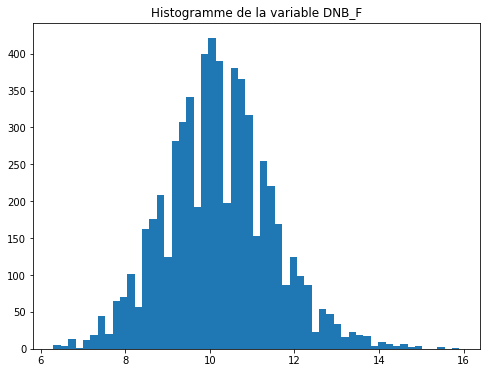

La variable DNB_F ne suit pas une loi normale (p-value=2.779403841284191e-21)


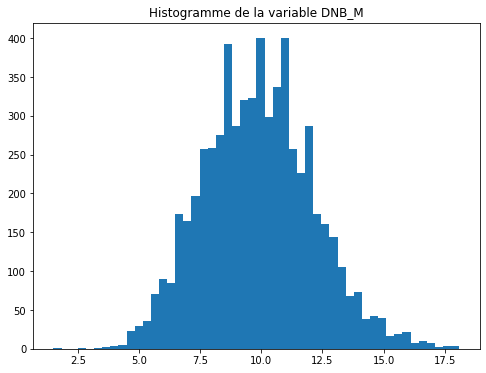

La variable DNB_M ne suit pas une loi normale (p-value=6.1892173914149435e-12)


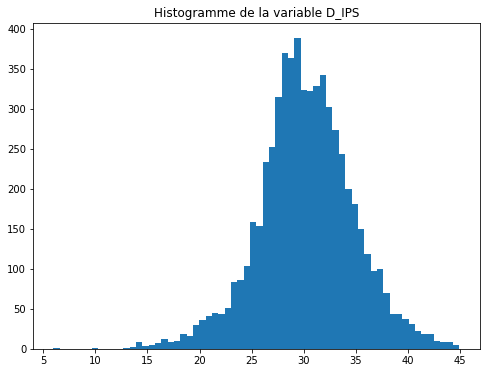

La variable D_IPS ne suit pas une loi normale (p-value=4.094718634698556e-22)


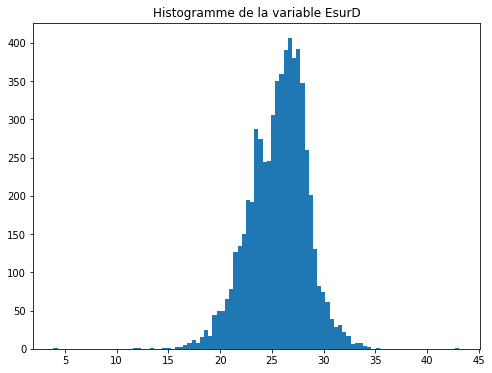

La variable EsurD ne suit pas une loi normale (p-value=1.0648922356736874e-65)


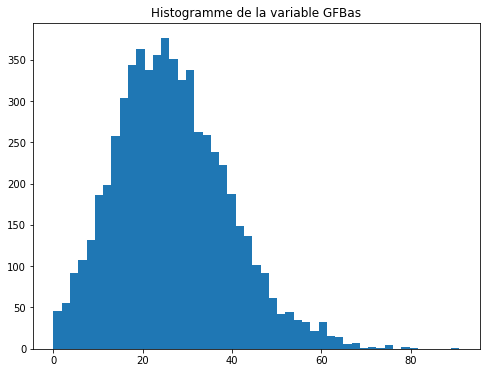

La variable GFBas ne suit pas une loi normale (p-value=3.3505550496755397e-57)


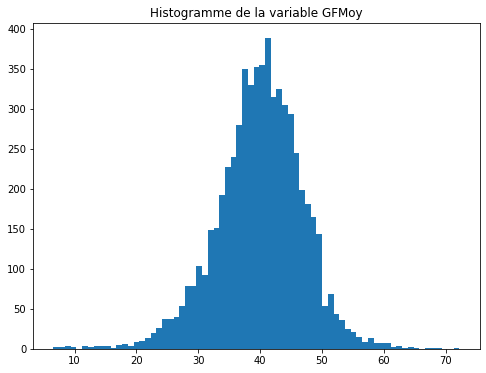

La variable GFMoy ne suit pas une loi normale (p-value=1.2572754771868231e-58)


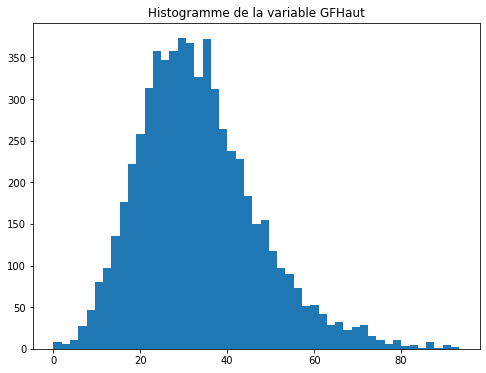

La variable GFHaut ne suit pas une loi normale (p-value=2.289493724587948e-118)


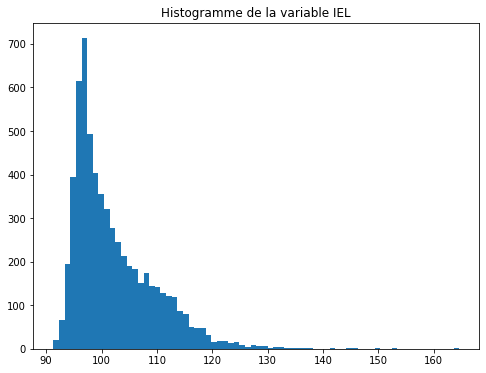

La variable IEL ne suit pas une loi normale (p-value=0.0)


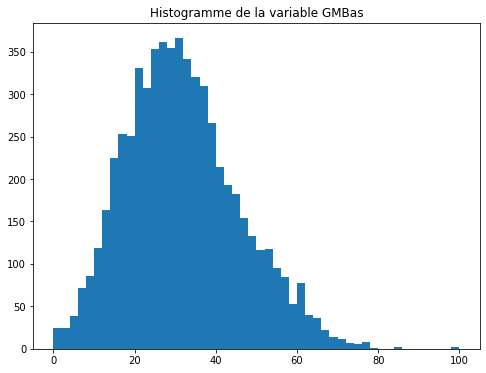

La variable GMBas ne suit pas une loi normale (p-value=6.035875551817907e-44)


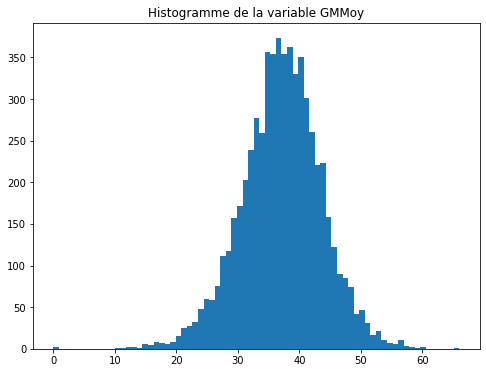

La variable GMMoy ne suit pas une loi normale (p-value=2.3281714341338504e-28)


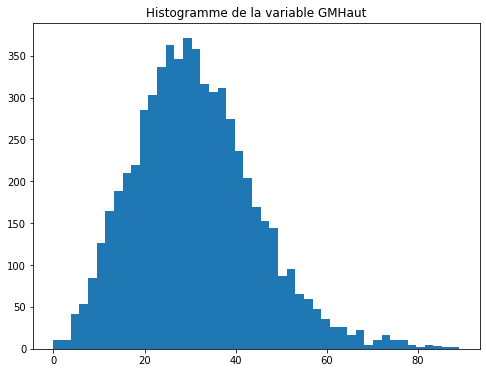

La variable GMHaut ne suit pas une loi normale (p-value=8.091977889554626e-77)


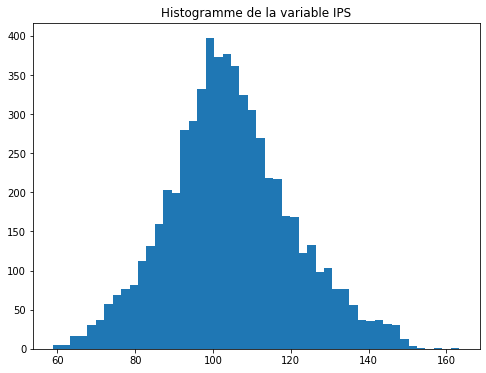

La variable IPS ne suit pas une loi normale (p-value=5.43496170738018e-12)


In [11]:
# Analyse de la normalité


# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in dfCLG.columns[1:-1]:
    plt.figure(figsize=(8, 6))
    data = dfCLG[column].to_numpy()
    hist, bins = np.histogram(data, bins='auto')
    width = bins[1] - bins[0]
    plt.bar(bins[:-1], hist, align='edge', width=width)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(dfCLG[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

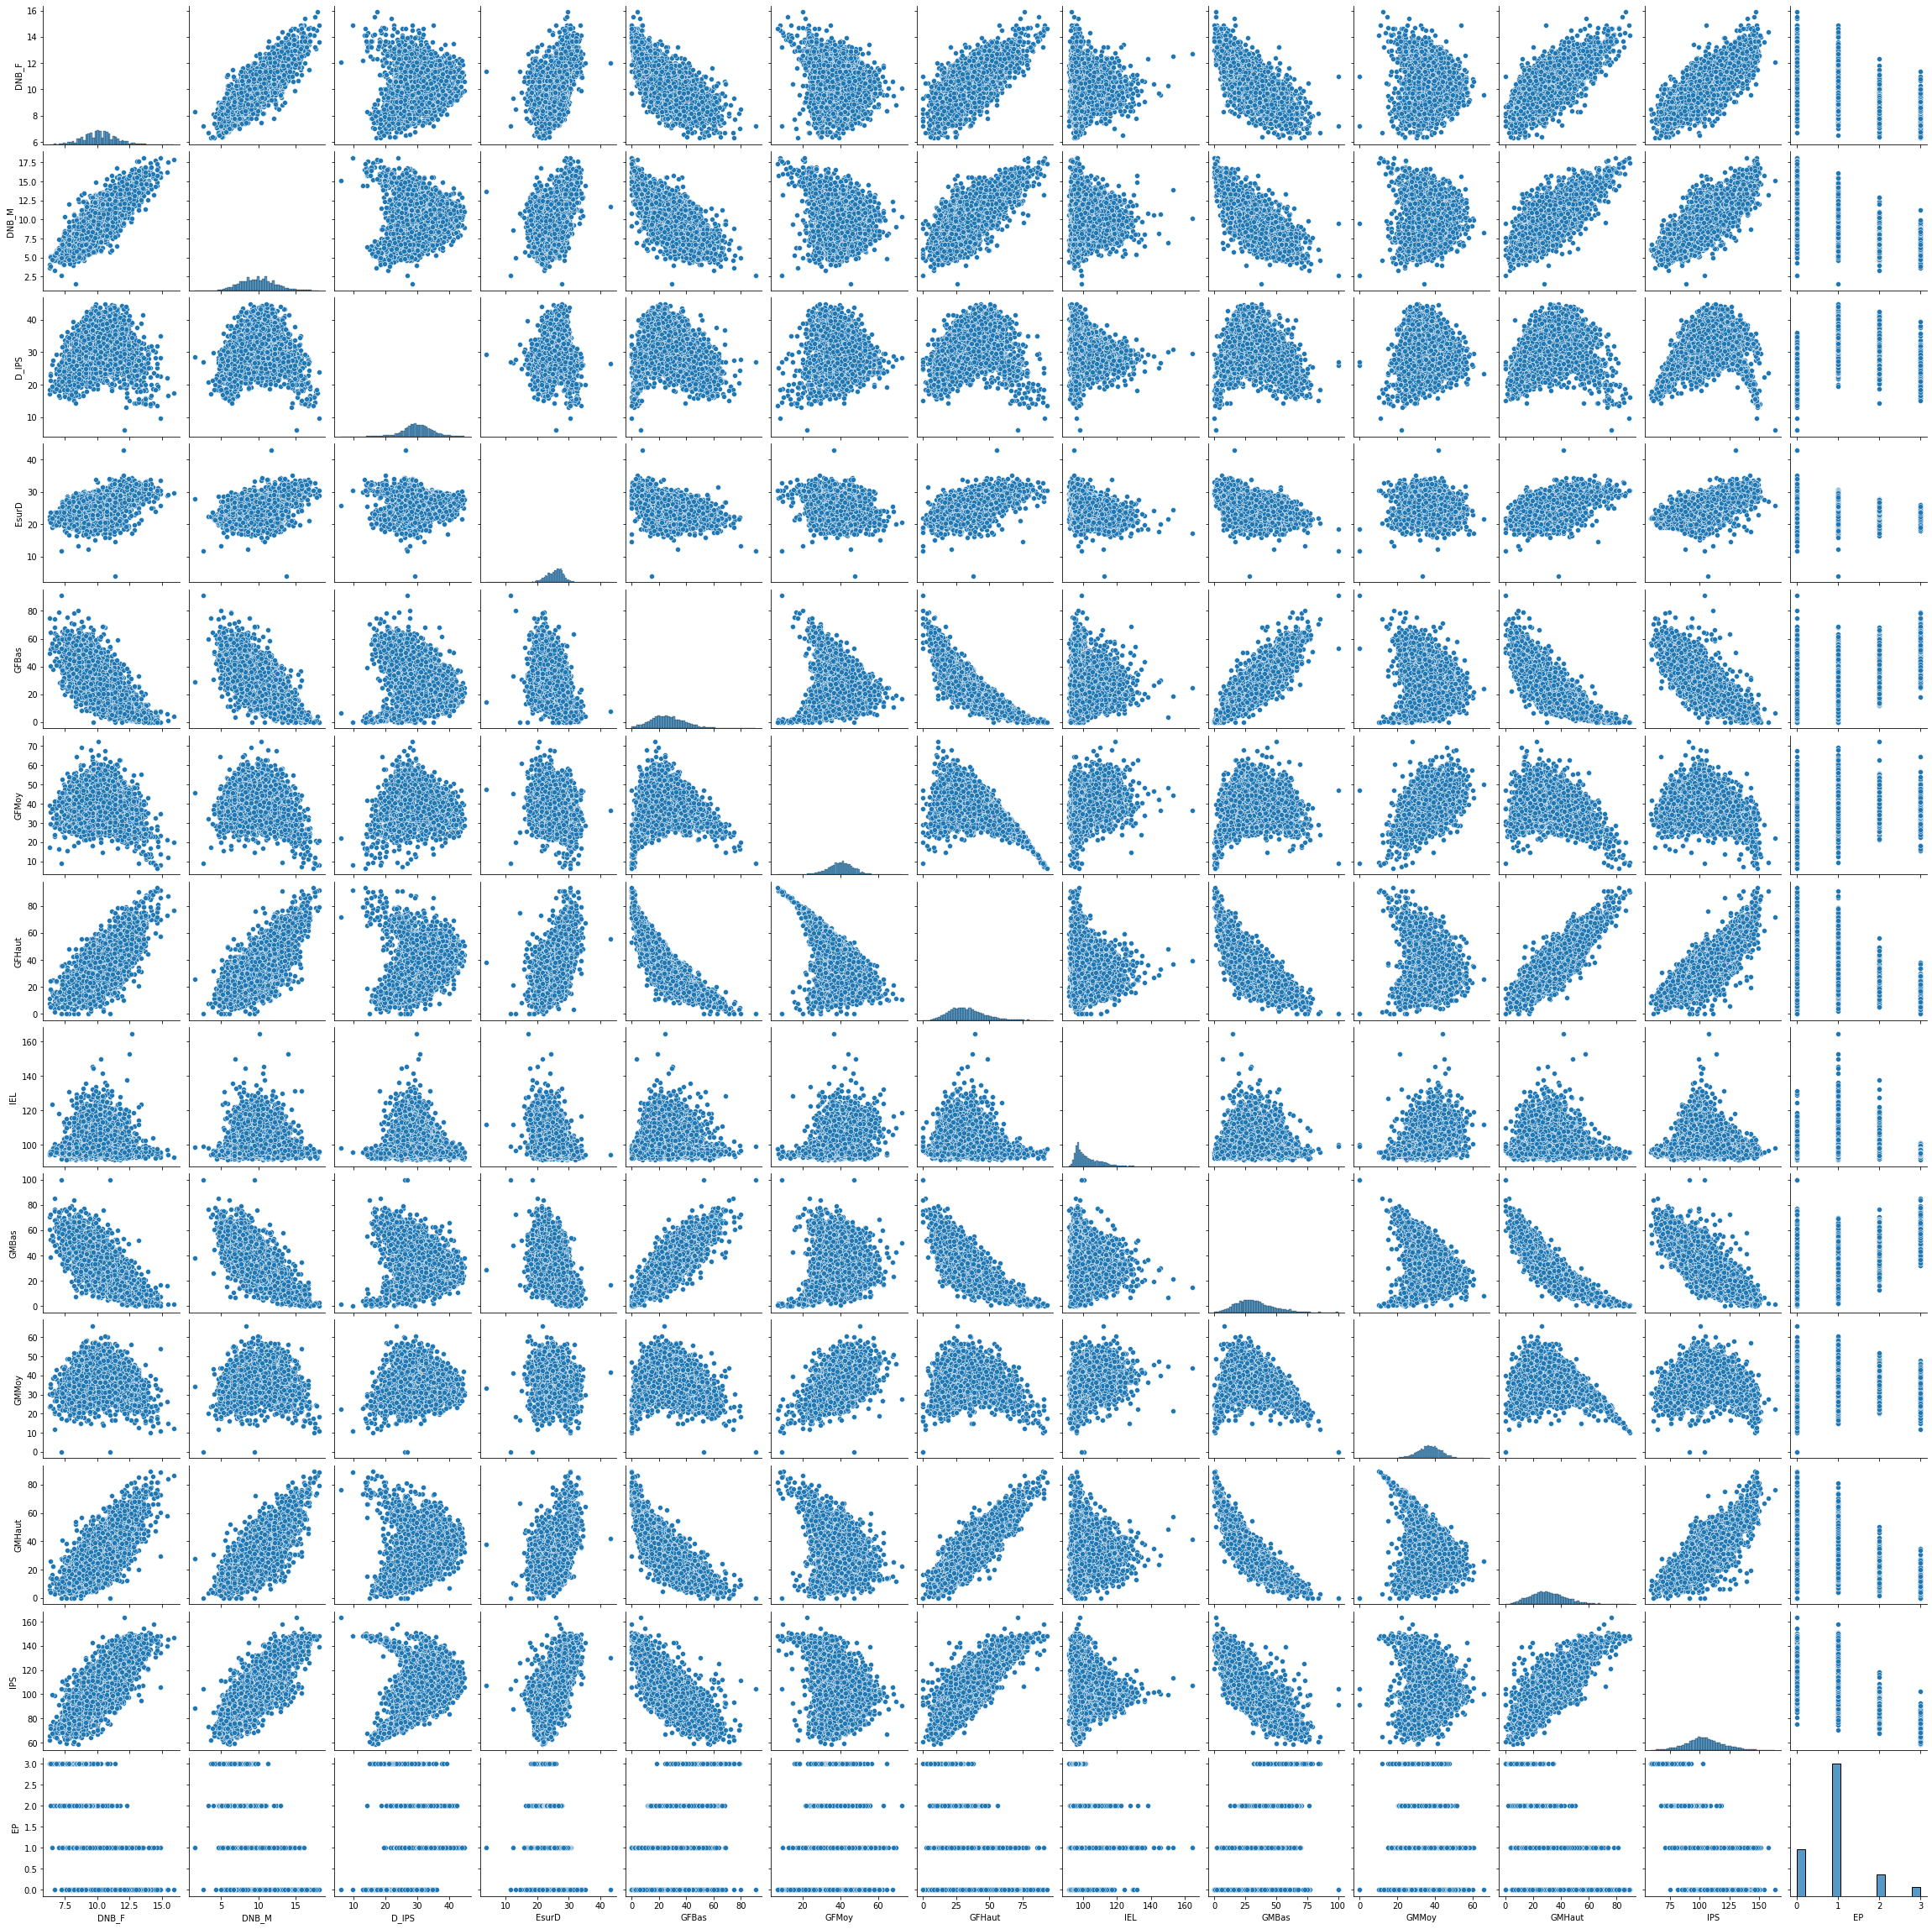

In [12]:
# Relation entre les variables quantitatives

sns.pairplot(dfCLG)

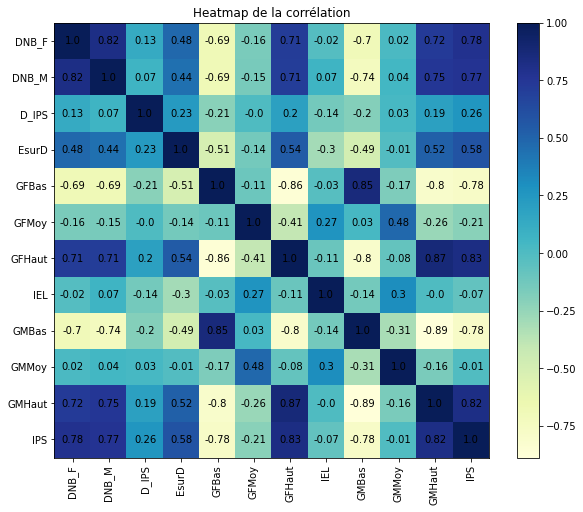

In [13]:
# Obtenir le tableau de corrélation
corr_matrix = dfCLG.iloc[:,1:-1].corr()

# Créer une heatmap à partir de la matrice de corrélation
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='YlGnBu')

# Ajouter les valeurs de corrélation dans chaque case
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = plt.text(j, i, round(corr_matrix.iloc[i, j], 2),
                        ha='center', va='center', color='black')
# Afficher la carte
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Heatmap de la corrélation')
plt.show()

## Construction de l'ACP

In [14]:
# Rejet de certaines variables

dfACP =  dfCLG.drop(columns=['DNB_M','GFBas','GFHaut','GMBas','GMHaut','IEL'])

In [15]:
dfACP.head()

,UAI,DNB_F,D_IPS,EsurD,GFMoy,GMMoy,IPS,EP
0,0040001E,10.3,30.2,21.6,48.2,44.8,99.4,1.0
1,0040004H,9.6,26.7,20.1,36.6,40.0,100.6,1.0
2,0040013T,9.2,31.3,22.4,45.7,29.2,88.6,1.0
3,0040014U,10.0,28.2,22.0,38.4,51.8,102.5,1.0
4,0040017X,8.4,30.6,24.3,37.2,40.7,98.3,1.0


In [16]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = dfACP.iloc[:, 1:-1].values

In [17]:
X.shape

(6138, 6)

In [18]:
# Standardisation des données
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Réduction de dimension
pca = PCA()
X_pca=pca.fit_transform(X_scaled)

## Aide à l'interprétation

### Choix du nombre d'axe

In [20]:
# Analyse des valeurs propres et de la variance expliquée
pca.explained_variance_,pca.explained_variance_ratio_

(array([2.40093747, 1.44823075, 0.92030445, 0.54608313, 0.48798649,
        0.19743539]),
 array([0.40009105, 0.24133247, 0.15335909, 0.09099903, 0.08131783,
        0.03290054]))

In [21]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,2.400937,40.0,40.0
1,Dim2,1.448231,24.0,64.0
2,Dim3,0.920304,15.0,79.0
3,Dim4,0.546083,9.0,89.0
4,Dim5,0.487986,8.0,97.0
5,Dim6,0.197435,3.0,100.0


In [22]:
seuil = 100./6.

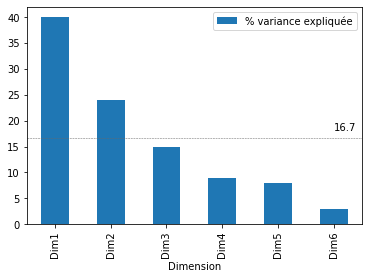

In [23]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "%2.1f"%seuil) # ajout de texte
plt.axhline(y = seuil, linewidth = .5, color = "dimgray", linestyle = "--") # ligne seuil 
plt.show()

In [24]:
# Les quatre premiers axes permettent d'expliquer près de 90% de la variance.

In [25]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = X.shape[1]
feature_names=dfACP.columns[1:7]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

       PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
DNB_F     0.709931     0.015498     0.087795     0.080414     0.029376   
D_IPS     0.135992     0.047072     0.795545     0.019386     0.000021   
EsurD     0.587425     0.013913     0.000077     0.380242     0.014721   
GFMoy     0.124126     0.620705     0.000523     0.024363     0.229689   
GMMoy     0.012797     0.739120     0.021614     0.017323     0.209251   
IPS       0.830666     0.011923     0.014751     0.024355     0.004930   

       PC6_contrib  
DNB_F     0.077150  
D_IPS     0.002147  
EsurD     0.003785  
GFMoy     0.000757  
GMMoy     0.000059  
IPS       0.113537  


In [26]:
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Convertir les contributions en pourcentage
variable_contrib_percent = variable_contributions / eigenvalues * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

print(variable_contrib_df)

       PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
DNB_F    29.568907     1.070160     9.539752    14.725528     6.019744   
D_IPS     5.664111     3.250315    86.443649     3.550019     0.004300   
EsurD    24.466487     0.960679     0.008420    69.630798     3.016619   
GFMoy     5.169904    42.859509     0.056791     4.461447    47.068694   
GMMoy     0.533009    51.036032     2.348519     3.172311    42.880392   
IPS      34.597582     0.823304     1.602869     4.459897     1.010251   

       PC6_contrib  
DNB_F    39.075909  
D_IPS     1.087604  
EsurD     1.916997  
GFMoy     0.383655  
GMMoy     0.029736  
IPS      57.506097  


### Représentations graphiques

In [27]:
# Créer le cercle de corrélation
def cercle(Dim1,Dim2):
    coeff = np.transpose(pca.components_[[Dim1,Dim2], :])
    n = coeff.shape[0]
    xs = np.array([1, 0])
    ys = np.array([0, 1])

    # Créer la figure
    plt.figure(figsize=(10, 10))

    # Placer les vecteurs des variables
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
        plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

    # Placer le cercle unitaire
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

    # Ajuster les limites et les axes
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.axhline(0, color='gray', linewidth=1)
    plt.axvline(0, color='gray', linewidth=1)
    labelx = "Dimension "+str(Dim1+1)
    labely = "Dimension "+str(Dim2+1)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title('Cercle de corrélation')

    # Afficher la figure
    plt.show()

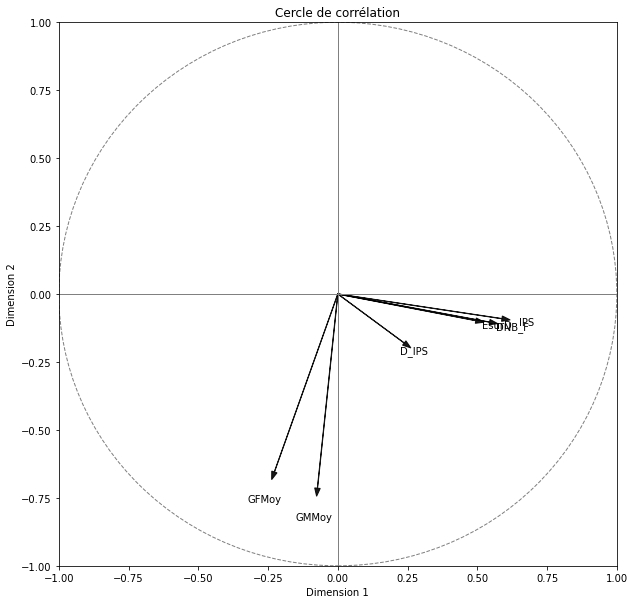

In [28]:
cercle(0,1)

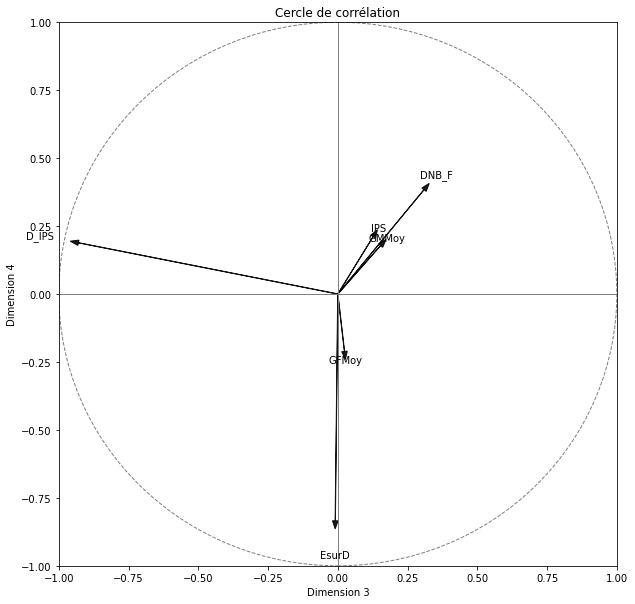

In [29]:
cercle(2,3)

- **Dimension 1:** dimension positivement corrélée à l'IPS, à la note à l'épreuce de français du DNB : **indicateur de positionnement social**
- **Dimension 2:** dimension négativement corrélée au pourcentage d'élèves dans le groupe 'Moyen' en français et en mathématiques aux évaluations de 6ème: **indicateur d'hétérogénéité scolaire**
- **Dimension 3:** fortement et négativement corrélée avec l'indice d'hétérogénéité sociale : **indicateur d'hétérogénéité sociale**
- **Dimension 4:** fortement et négativement corrélée avec l'indice EsurD : **indicateur lié aux moyens**

In [30]:
X_proj = pca.transform(X_scaled)

In [31]:
# Transformation en DataFrame pandas
X_proj_df = pd.DataFrame({
    "Dim1" : X_proj[:,0], 
    "Dim2" : X_proj[:,1],
})

# Résultat (premières lignes)
X_proj_df.head()

,Dim1,Dim2
0,-1.227407,-1.454298
1,-1.498816,0.404145
2,-1.635714,0.570203
3,-1.032536,-1.228896
4,-1.168440,0.078461


In [32]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'Dim{x+1} {v1}')
    ax.set_ylabel(f'Dim{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur Dim{x+1} et Dim{y+1})")
    plt.show()

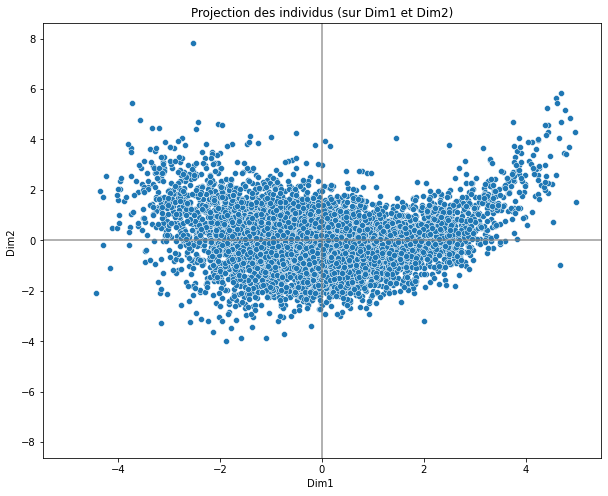

In [33]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y)

## Clustering avec KMeans

In [34]:
from sklearn.cluster import KMeans

In [35]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

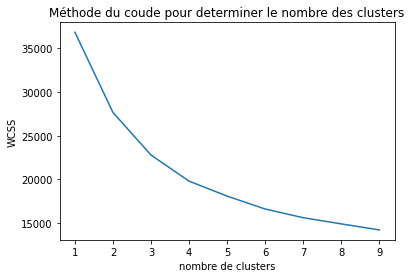

In [36]:
plt.plot(range(1, 10), wcss)
plt.title('Méthode du coude pour determiner le nombre des clusters')
plt.xlabel('nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
nbre_clusters = 4

In [38]:
kmeans = KMeans(n_clusters=nbre_clusters, init = 'k-means++')
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

In [39]:
dfACP['cluster']=clusters

In [40]:
df_clusters = dfACP.select_dtypes(include=[np.number]).groupby(['cluster']).median().round(0)
    
df_clusters

,DNB_F,D_IPS,EsurD,GFMoy,GMMoy,IPS,EP
cluster,,,,,,,
0,10.0,34.0,27.0,38.0,36.0,110.0,1.0
1,9.0,27.0,23.0,38.0,33.0,87.0,2.0
2,12.0,28.0,29.0,33.0,34.0,132.0,0.0
3,10.0,30.0,26.0,45.0,42.0,102.0,1.0


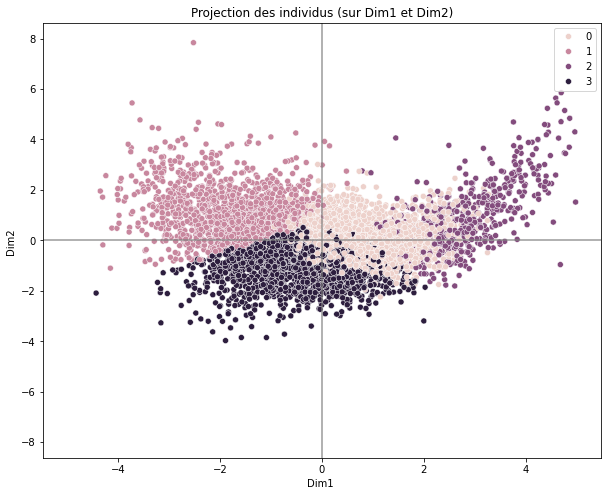

In [41]:
display_factorial_planes(X_proj, [0,1],clusters=clusters)

In [42]:
df_clusters.head()

,DNB_F,D_IPS,EsurD,GFMoy,GMMoy,IPS,EP
cluster,,,,,,,
0,10.0,34.0,27.0,38.0,36.0,110.0,1.0
1,9.0,27.0,23.0,38.0,33.0,87.0,2.0
2,12.0,28.0,29.0,33.0,34.0,132.0,0.0
3,10.0,30.0,26.0,45.0,42.0,102.0,1.0


In [43]:
dfACP.head()

,UAI,DNB_F,D_IPS,EsurD,GFMoy,GMMoy,IPS,EP,cluster
0,0040001E,10.3,30.2,21.6,48.2,44.8,99.4,1.0,3
1,0040004H,9.6,26.7,20.1,36.6,40.0,100.6,1.0,1
2,0040013T,9.2,31.3,22.4,45.7,29.2,88.6,1.0,1
3,0040014U,10.0,28.2,22.0,38.4,51.8,102.5,1.0,3
4,0040017X,8.4,30.6,24.3,37.2,40.7,98.3,1.0,1


In [44]:
df_fin = pd.merge(dfCLG, dfACP[['UAI', 'cluster']], on='UAI', how='left')
df_fin.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,GMMoy,GMHaut,IPS,EP,cluster
0,0040001E,10.3,6.9,30.2,21.6,3.4,48.2,48.3,150.1,6.9,44.8,48.2,99.4,1.0,3
1,0040004H,9.6,10.7,26.7,20.1,30.0,36.6,33.4,145.6,30.0,40.0,30.0,100.6,1.0,1
2,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,29.2,27.8,88.6,1.0,1
3,0040014U,10.0,5.9,28.2,22.0,11.5,38.4,50.0,124.0,33.3,51.8,14.8,102.5,1.0,3
4,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,40.7,34.8,98.3,1.0,1


In [45]:
moyennes = df_fin.iloc[:,1:-1].mean()

In [46]:
liste_moyennes = [moyennes]
for i in range(nbre_clusters):
    df_filtre = df_fin[df_fin.iloc[:, -1] == i]
    liste_moyennes.append(df_filtre.iloc[:,1:-1].mean())

In [47]:
df_moyennes = pd.DataFrame(liste_moyennes)
df_moyennes = df_moyennes.drop(columns=['EP'],axis=1)
noms_lignes = ['national', 'cluster0', 'cluster1', 'cluster2', 'cluster3']
df_moyennes.index = noms_lignes

In [48]:
# Compter le nombre de lignes pour chaque combinaison EP et cluster
count_df = df_fin.groupby(['EP', 'cluster']).size().unstack().fillna(0)
count_df

cluster,0,1,2,3
EP,,,,
0.0,168.0,98.0,494.0,617.0
1.0,1746.0,488.0,101.0,1519.0
2.0,43.0,482.0,0.0,107.0
3.0,2.0,268.0,0.0,5.0


In [49]:
# Ajouter les colonnes EP0, EP1, EP2 et EP3 dans df_moyennes 
df_moyennes['Privé sous contrat'] = [count_df.loc[0,:].sum(), count_df.loc[0, 0]/count_df.loc[0,:].sum(), count_df.loc[0, 1]/count_df.loc[0,:].sum(), count_df.loc[0, 2]/count_df.loc[0,:].sum(), count_df.loc[0, 3]/count_df.loc[0,:].sum()]
df_moyennes['Public HEP'] = [count_df.loc[1,:].sum(), count_df.loc[1, 0]/count_df.loc[1,:].sum(), count_df.loc[1, 1]/count_df.loc[1,:].sum(), count_df.loc[1, 2]/count_df.loc[1,:].sum(), count_df.loc[1, 3]/count_df.loc[1,:].sum()]
df_moyennes['REP'] = [count_df.loc[2,:].sum(), count_df.loc[2, 0]/count_df.loc[2,:].sum(), count_df.loc[2, 1]/count_df.loc[2,:].sum(), count_df.loc[2, 2]/count_df.loc[2,:].sum(), count_df.loc[2, 3]/count_df.loc[2,:].sum()]
df_moyennes['REP+'] = [count_df.loc[3,:].sum(), count_df.loc[3, 0]/count_df.loc[3,:].sum(), count_df.loc[3, 1]/count_df.loc[3,:].sum(), count_df.loc[3, 2]/count_df.loc[3,:].sum(), count_df.loc[3, 3]/count_df.loc[3,:].sum()]

In [50]:
df_moyennes

,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,GMMoy,GMHaut,IPS,Privé sous contrat,Public HEP,REP,REP+
national,10.209058,9.883399,30.215852,25.640453,26.626051,39.987895,33.387309,102.146595,31.745455,37.072858,31.179456,104.557234,1377.000000,3854.000000,632.000000,275.000000
cluster0,10.476365,10.236549,34.348800,26.717458,23.887443,38.102859,38.013272,100.418275,28.807810,35.407759,35.781164,110.485962,0.122004,0.453036,0.068038,0.007273
cluster1,8.863922,7.659656,26.854266,22.958608,41.305015,37.603443,21.089296,101.214596,48.377769,32.810554,18.810404,86.216991,0.071169,0.126622,0.762658,0.974545
cluster2,12.371092,13.451261,27.246891,29.321176,9.577815,32.026050,58.398151,97.506387,13.307059,32.878824,53.812605,132.315966,0.358751,0.026207,0.000000,0.000000
cluster3,10.203292,9.952891,29.397865,25.321530,24.801112,45.155027,30.044973,105.434786,29.301023,42.167082,28.529804,102.943238,0.448076,0.394136,0.169304,0.018182


**cluster 0:** ensemble des collèges dont le profil est plutôt celui du secteur public HEP, avec une population scolaire plus favorisée qu'en moyenne au plan national et qui se caractérise par un niveau scolaire conforme à la moyenne nationale.
Le cluster 0 est appelé ci-après **(groupe favorisé)**.

**cluster 1:** ensemble des collèges de l'éducation prioritaire ou dont le profil s'en rapproche: IPS plus faible, population scolaire d'élèves qui obtiennent des résultats nettement inférieurs à la moyenne nationale. Ces collèges sont caractérisés par une hétérogénéité sociale réduite.
Le cluster 1 est appelé ci-après **(groupe défavorisé)**.

**cluster 2:** ensemble des collèges dont le profil est plutôt celui du secteur privé sous contrat et dont la population scolaire, socialement favorisée et peu diversifiée socialement, se distingue par des résultats scolaires supérieurs à la moyenne nationale.
Le cluster 2 est appelé ci-après **(groupe très favorisé)**.

**cluster 3:** ensemble des collèges des secteurs privé sous contrat et public, caractérisés par un IPS moyen et dont la population scolaire est préférentiellement constituée d'élèves de niveau intermédiaire. 
Le cluster 3 est appelé ci-après **(groupe standard)**.

In [51]:
# À ajuster selon la numérotation des clusters
couleur_cluster = ['purple','blue','orange','green']

In [52]:
valeur_cluster = 0
df_filtre = df_fin[df_fin.iloc[:, -1] == valeur_cluster]

In [53]:
nom_fichier = 'ACP/CLGFRA-clusterized.xlsx'
df_fin.to_excel(nom_fichier, index=False)

In [54]:
# À ajuster selon la numérotation des clusters
legend_clusters = ["groupe favorisé","groupe défavorisé","groupe très favorisé","groupe standard"]

In [55]:
def repartition(dpt):
    df_dpt = df_fin[df_fin.iloc[:, 0].str.startswith(dpt)]
    # Compter le nombre de collèges du département dpt pris en compte dans l'analyse
    nombre_CLG = len(df_dpt)

    repartition_cluster = []
    for i in range(nbre_clusters):
        # Compter le nombre de lignes où la dernière colonne "cluster" prend la valeur i
        repartition_cluster.append((df_dpt["cluster"] == i).sum())
    # on convertit la liste en tableau numpy
    repartition_cluster = np.array(repartition_cluster)
    # on calcule les % de collèges dans chaque cluster
    repartition_cluster = repartition_cluster / nombre_CLG
    print ("Département " + dpt + " :")
    for i in range(4):
        print("\033[1;34m%2.1f %%\033[0m des collèges dans"%(repartition_cluster[i]*100)+" le "+legend_clusters[i])

In [56]:
repartition("068")

Département 068 :
29.2 % des collèges dans le groupe favorisé
20.0 % des collèges dans le groupe défavorisé
4.6 % des collèges dans le groupe très favorisé
46.2 % des collèges dans le groupe standard


In [57]:
repartition("093")

Département 093 :
13.4 % des collèges dans le groupe favorisé
64.1 % des collèges dans le groupe défavorisé
6.3 % des collèges dans le groupe très favorisé
16.2 % des collèges dans le groupe standard


In [63]:
# Transformation en DataFrame pandas
XX_proj_df = pd.DataFrame({
    "Dim1" : X_proj[:,0], 
    "Dim2" : X_proj[:,1],
    "Dim3" : X_proj[:,2],
    "Dim4" : X_proj[:,3],
})
df_fin_proj = pd.concat([df_fin.iloc[:, :-1], XX_proj_df, df_fin.iloc[:, -1:]], axis=1)
df_fin_proj.head()

,UAI,DNB_F,DNB_M,D_IPS,EsurD,GFBas,GFMoy,GFHaut,IEL,GMBas,GMMoy,GMHaut,IPS,EP,Dim1,Dim2,Dim3,Dim4,cluster
0,0040001E,10.3,6.9,30.2,21.6,3.4,48.2,48.3,150.1,6.9,44.8,48.2,99.4,1.0,-1.227407,-1.454298,0.207695,1.136997,3
1,0040004H,9.6,10.7,26.7,20.1,30.0,36.6,33.4,145.6,30.0,40.0,30.0,100.6,1.0,-1.498816,0.404145,0.613857,1.470239,1
2,0040013T,9.2,6.7,31.3,22.4,27.1,45.7,27.1,96.6,43.0,29.2,27.8,88.6,1.0,-1.635714,0.570203,-0.746058,0.118112,1
3,0040014U,10.0,5.9,28.2,22.0,11.5,38.4,50.0,124.0,33.3,51.8,14.8,102.5,1.0,-1.032536,-1.228896,0.697256,1.373502,3
4,0040017X,8.4,8.4,30.6,24.3,31.4,37.2,31.4,129.4,24.4,40.7,34.8,98.3,1.0,-1.168440,0.078461,-0.484795,-0.022641,1


In [69]:
def display_factorial_planes_dpt(dpt,
                                 x_y,
                                 pca=None,
                                 labels = None,
                                 clusters=None,
                                 alpha=1,
                                 figsize=[10,8],
                                 marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """
    df_dpt = df_fin_proj[df_fin_proj.iloc[:, 0].str.startswith(dpt)]
    
    # Transforme X_projected en np.array
    X_ = np.array(df_dpt.iloc[:,-5:].values)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue = X_[:,-1])

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''
    Lab = ['Indice de positionnement social',"Indice d'hétérogénéité scolaire","Indice d'hétérogénéité sociale","Indice de moyens"]
    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(Lab[x])
    ax.set_ylabel(Lab[y])

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    titre = "Collèges "+dpt
    plt.title(titre)
    plt.show()

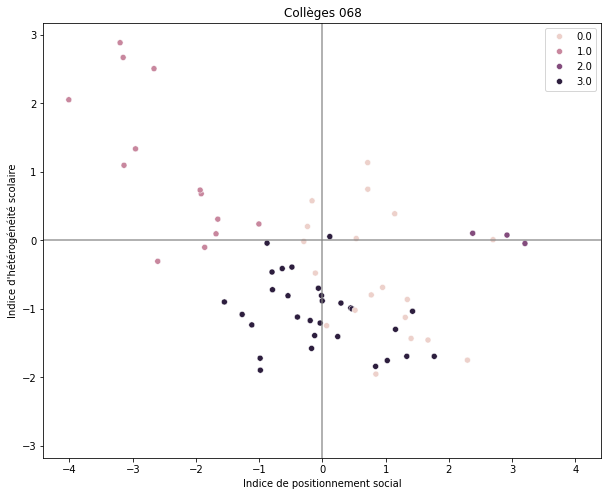

In [72]:
display_factorial_planes_dpt("068",[0,1])

# Cartographie

In [73]:
import folium

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (5.2.0)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [74]:
# import du fichier Excel avec les références géographiques des collèges
df_coor = pd.read_excel("ACP/GEOCLG.xlsx")
# fusion avec le dataframe qui contient les indicateurs et le numéro de cluster
df_geo = pd.merge(df_fin, df_coor, on='UAI', how='left')

In [75]:
# Suppression des lignes avec des latitudes et longitudes erronées ou inconnues
df_geo = df_geo.dropna()
df_geo.isnull().sum()
df_geo['DPT'] = df_geo['DPT'].astype(float)

In [76]:
nom_fichier = 'ACP/CLGFRA-clusterized.xlsx'
df_geo.to_excel(nom_fichier, index=False)

In [94]:
def cartedpt(dpt_value,titre):
    '''
    dpt_value est une liste qui contient les numéros des départements à cartographier
    titre est une chaîne de caractères qui vient compléter le nom de la carte
    '''
    # Créer une carte centrée sur la France
    map_fr = folium.Map(location=[46.603354, 1.888334], zoom_start=6)
    for elt in dpt_value:
        # Filtrer les établissements en fonction de la valeur de 'DPT'
        df_dpt = df_geo[df_geo['DPT'] == elt]

        # Parcourir chaque ligne du dataframe
        for index, row in df_dpt.iterrows():
            lat = row['LAT']
            long = row['LONG']
            cluster = row['cluster']
            uai = row['UAI']
            nom = row['NOM']
            ep = int(row['EP'])
            label = legend_clusters[cluster]
            lab_EP = label_ep[ep]
    
            # Déterminer la couleur en fonction de la valeur de 'cluster'
            color = couleur_cluster[cluster]
    
            # Ajouter un marqueur à la carte avec l'étiquette contenant 'UAI' et 'NOM'
            tooltip_content = f"{uai} - {nom} <br> {label} - {lab_EP}"
            folium.Marker(location=[lat, long], icon=folium.Icon(color=color), tooltip=tooltip_content).add_to(map_fr)

    # Enregistrer la carte
    nom_fichier = "ACP/carteCLG"+titre+".html"
    map_fr.save(nom_fichier)

In [95]:
cartedpt([77,93,94],"CRETEIL")

In [96]:
cartedpt([67,68],"Alsace")

In [97]:
cartedpt([59,62],"LILLE")